In [1]:
import numpy as np
import math
import pandas as pd
from timeit import default_timer as timer  
import datetime

from pandas_datareader import data
import pandas_datareader as web
import seaborn as sns

import datetime
from datetime import timezone
from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('dark_background')

from scipy.optimize import minimize
from scipy import stats
from random import sample
import statsmodels.api as sm


import statsmodels
from IPython.display import display, clear_output

from pathlib import Path


In [2]:
# DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_2g.csv"
DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_2g_user_weights.csv"
# DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_BERT_trainable_full.csv"
# DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_glove_91_filtered_full_user_weights_user_averaged.csv"
# DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_full_user_weights.csv"
# DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_full_user_weights_user_averaged.csv"
# DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_glove_91_filtered_full_user_averaged.csv"
# DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_91_glove_filtered_full.csv"

TRADING_STRATEGY_FILEPATH = './Trading Strategy'

## Inspecting the Datasets

In [ ]:
DATASET_FILEPATHS = ["./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_2g.csv"
,"./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_2g_user_weights.csv"
,"./Data Preprocessed/Dataset_sentiment_BERT_trainable_full.csv"
,"./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_full_user_weights.csv"
,"./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_full_user_weights_user_averaged.csv"]

In [ ]:

plt.plot(df['Open'][1200:1300].values)
plt.show()
for filepath in DATASET_FILEPATHS:
    df = pd.read_csv(filepath, index_col = 0)
    format = "%Y-%m-%d %H"
    df.index = [datetime.strptime(i, format) for i in df.index]
    plt.title(filepath[38:-4])
    plt.plot(df['Bitcoin'][1200:1300].values)
    plt.show()

In [ ]:
for filepath in DATASET_FILEPATHS:
    df = pd.read_csv(filepath, index_col = 0)
    format = "%Y-%m-%d %H"
    df.index = [datetime.strptime(i, format) for i in df.index]
    #BTC price data of the next hour standarized
    Y = pd.DataFrame(df['Open']).astype(float)
    #Y = dataset_standarization(Y)

    #Textual data ('Bitcoin' topic popularity) of the last hour standarized
    X = pd.DataFrame(df['Bitcoin_median']).astype(float)
    #X = dataset_standarization(X)
    Y.index = X.index

    X = sm.add_constant(X)

    model = sm.OLS(Y, X, missing = 'drop').fit()
    print(filepath[38:-4])
    print(model.summary())

In [3]:
df = pd.read_csv(DATASET_FILEPATH, index_col = 0)
format = "%Y-%m-%d %H"
df.index = [datetime.strptime(i, format) for i in df.index]
df

,Bitcoin,Bitcoin_median,Open
2017-09-13 01:00:00,0.041773,0.066211,4128.005439
2017-09-13 02:00:00,0.051911,0.089798,4066.801167
2017-09-13 03:00:00,0.027604,0.052726,3999.225167
2017-09-13 04:00:00,0.018836,0.042056,3959.409667
2017-09-13 05:00:00,0.076571,0.109514,3995.046667
...,...,...,...
2019-01-22 18:00:00,0.030288,0.050931,3584.926897
2019-01-22 19:00:00,0.025549,0.053502,3585.858545
2019-01-22 20:00:00,0.028746,0.057698,3585.295893
2019-01-22 21:00:00,0.034695,0.073557,3579.910755


In [74]:
df['date'] = df.index.map(lambda x : str(x)[:-8])
df['place'] = range(0,1413)
df

,Bitcoin,Bitcoin_median,open,close,date,place
2017-09-13 01:00:00,0.586789,0.623524,4142.25,4105.13,2017-09-13,0
2017-09-13 02:00:00,0.607135,0.631940,4101.49,4026.02,2017-09-13,1
2017-09-13 03:00:00,0.586056,0.623793,4035.48,3945.00,2017-09-13,2
2017-09-13 04:00:00,0.564152,0.610086,3951.62,4010.00,2017-09-13,3
2017-09-13 05:00:00,0.639324,0.745114,4009.01,3975.99,2017-09-13,4
...,...,...,...,...,...,...
2019-01-22 18:00:00,0.671039,0.809904,3591.48,3590.67,2019-01-22,1408
2019-01-22 19:00:00,0.659036,0.802012,3589.30,3579.28,2019-01-22,1409
2019-01-22 20:00:00,0.651866,0.825288,3579.28,3585.51,2019-01-22,1410
2019-01-22 21:00:00,0.667588,0.813837,3586.72,3574.26,2019-01-22,1411


In [81]:
k = pd.DataFrame(df.groupby(['date']).Bitcoin_median.apply(np.mean).values)
index = df.groupby(['date']).place.first()
l = pd.DataFrame(df.groupby(['date']).Bitcoin.apply(np.mean).values)

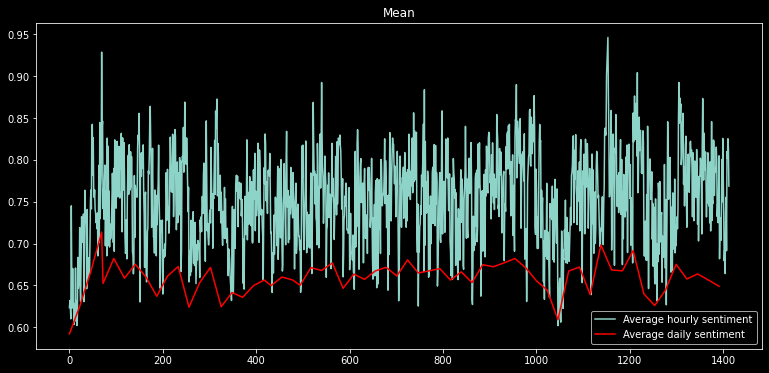

In [90]:
fig = plt.figure(figsize=(13, 6))
plt.title("Mean")
x_axis = range(0,1413)

plt.plot(x_axis,df.Bitcoin_median, label = 'Average hourly sentiment')
plt.plot(index,df.groupby(['date']).Bitcoin.apply(np.mean),color = "red", label = 'Average daily sentiment')
plt.legend()
plt.show()

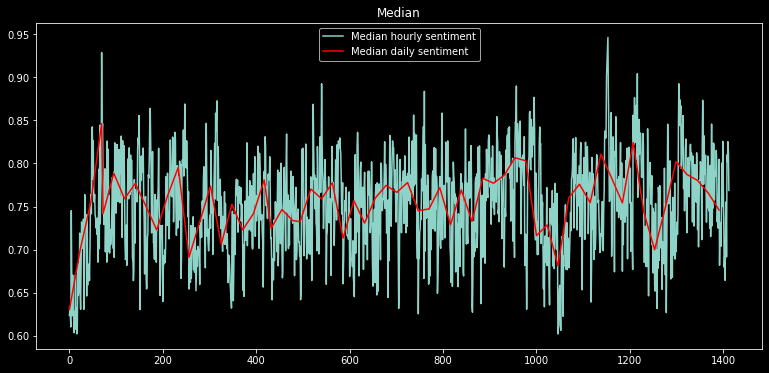

In [93]:
fig = plt.figure(figsize=(13, 6))
plt.title("Median")
x_axis = range(0,1413)

plt.plot(x_axis,df.Bitcoin_median, label = 'Median hourly sentiment')
plt.plot(index,df.groupby(['date']).Bitcoin_median.apply(np.median),color = "red", label = 'Median daily sentiment')
plt.legend()
plt.show()

In [39]:
print(df.Bitcoin_median.max())
print(df.groupby(['date']).Bitcoin_median.apply(np.mean).max())

0.9463120698928832
0.8710964123407999


## Trading Strategy Backtesting <a class="anchor" id="section_5_3"></a>

In [4]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.append(TRADING_STRATEGY_FILEPATH)
from custom_trading_engine import customNLP
from signals import *
from strategies import *

In [ ]:
#best strategy play the opposite (with stoploss)
cash = []
for stop in range(1, 50):
    signal = Signal2(df['Bitcoin'])
    strategy = BitcoinNLPStrategy2()
    strategy.add_signal(signal)
    algo = customNLP(100000, df['Open'], strategy)
    algo.set_stoploss(stop/1000)
    
    algo.run(split = True, verbose = False)
    cash.append(algo.cash)
#plt.plot(list(algo.metrics['Portfolio Marked']))

In [ ]:
plt.plot(cash)

In [ ]:
np.min(df['Bitcoin'].values)

In [34]:
signal = Signal2(df['Bitcoin'])
strategy = BitcoinNLPStrategy2()
strategy.add_signal(signal)
algo = customNLP(100000, df[['Open','Open']], strategy)
#algo.set_stoploss(0.01)

algo.run(split = True)

C:\Users\Konst\Desktop\PythonNotebooks\TradingNLP\./Trading Strategy\signals.py:20: RuntimeWarning: invalid value encountered in double_scalars
  return -10000 * (self.data[datetime] - mean) / stdv


selling  10000.000000000005  BTC at  4066.801166666666  $
closing  -10000.000000000005  BTC at  3999.2251666666666  $
buying  12865.729429336257  BTC at  3999.2251666666666  $
closing  12865.729429336257  BTC at  3995.046666666667  $
selling  16499.72438064325  BTC at  3995.046666666667  $
closing  -16499.72438064325  BTC at  4005.1322641509432  $
selling  6995.407217255767  BTC at  4005.1322641509432  $
closing  -6995.407217255767  BTC at  3982.99  $
selling  13116.624923094252  BTC at  3982.99  $
closing  -13116.624923094252  BTC at  3969.537118644068  $
buying  1962.886075368145  BTC at  3969.537118644068  $
closing  1962.886075368145  BTC at  3839.3781666666655  $
buying  21866.048244539354  BTC at  3839.3781666666655  $
closing  21866.048244539354  BTC at  3833.9163333333327  $
buying  3574.264057063736  BTC at  3833.9163333333327  $
closing  3574.264057063736  BTC at  3868.011  $
buying  1977.208817902875  BTC at  3868.011  $
closing  1977.208817902875  BTC at  3794.985666666667 

buying  10000.0  BTC at  6071.602833333333  $
closing  10000.0  BTC at  6085.6359649122805  $
selling  11743.080361591767  BTC at  6085.6359649122805  $
closing  -11743.080361591767  BTC at  6093.565964912281  $
selling  4620.688196128827  BTC at  6093.565964912281  $
closing  -4620.688196128827  BTC at  6073.152166666667  $
selling  16527.91644767631  BTC at  6073.152166666667  $
closing  -16527.91644767631  BTC at  6094.0425  $
buying  9342.961632061251  BTC at  6094.0425  $
closing  9342.961632061251  BTC at  6104.586166666664  $
buying  4529.41638681396  BTC at  6104.586166666664  $
closing  4529.41638681396  BTC at  6139.857000000002  $
selling  10401.049879086624  BTC at  6139.857000000002  $
closing  -10401.049879086624  BTC at  6146.445166666667  $
selling  16247.534364567471  BTC at  6146.445166666667  $
closing  -16247.534364567471  BTC at  5995.315333333333  $
buying  12402.209173310473  BTC at  5995.315333333333  $
closing  12402.209173310473  BTC at  6008.0275  $
buying  8

closing  11134.864054025864  BTC at  11136.032500000005  $
buying  21729.28726571674  BTC at  11136.032500000005  $
closing  21729.28726571674  BTC at  11357.784666666666  $
selling  3702.5241208331267  BTC at  11357.784666666666  $
closing  -3702.5241208331267  BTC at  11584.563333333332  $
selling  25139.262095912418  BTC at  11584.563333333332  $
closing  -25139.262095912418  BTC at  11646.165666666668  $
selling  14413.175458310781  BTC at  11646.165666666668  $
closing  -14413.175458310781  BTC at  11721.536166666669  $
selling  5218.568814571713  BTC at  11721.536166666669  $
closing  -5218.568814571713  BTC at  11687.338666666668  $
selling  10298.064353643416  BTC at  11687.338666666668  $
closing  -10298.064353643416  BTC at  11608.903666666669  $
selling  12.222429320245144  BTC at  11608.903666666669  $
closing  -12.222429320245144  BTC at  11139.041833333333  $
selling  6218.569431410204  BTC at  11139.041833333333  $
closing  -6218.569431410204  BTC at  11149.956333333335 

closing  21951.16494064803  BTC at  8216.866499999998  $
selling  8075.636631725962  BTC at  8216.866499999998  $
closing  -8075.636631725962  BTC at  8246.723333333333  $
buying  22635.03812753902  BTC at  8246.723333333333  $
closing  22635.03812753902  BTC at  8343.517  $
buying  10864.433343529521  BTC at  8343.517  $
closing  10864.433343529521  BTC at  8069.997999999999  $
selling  10824.236650396142  BTC at  8069.997999999999  $
closing  -10824.236650396142  BTC at  8063.273333333332  $
selling  18089.166386082354  BTC at  8063.273333333332  $
closing  -18089.166386082354  BTC at  8221.684833333333  $
selling  6860.392824334237  BTC at  8221.684833333333  $
closing  -6860.392824334237  BTC at  8252.76433333333  $
buying  1902.2881706145001  BTC at  8252.76433333333  $
closing  1902.2881706145001  BTC at  8243.642  $
selling  2934.0506912409637  BTC at  8243.642  $
closing  -2934.0506912409637  BTC at  8327.6495  $
selling  14583.406445421137  BTC at  8327.6495  $
closing  -14583

buying  2546.097494248719  BTC at  9169.883333333331  $
closing  2546.097494248719  BTC at  9221.027166666669  $
selling  662.2249506989531  BTC at  9221.027166666669  $
closing  -662.2249506989531  BTC at  9204.4055  $
selling  9122.558347716784  BTC at  9204.4055  $
closing  -9122.558347716784  BTC at  9191.784  $
selling  856.4834057876442  BTC at  9191.784  $
closing  -856.4834057876442  BTC at  9214.362  $
selling  2618.173376621143  BTC at  9214.362  $
closing  -2618.173376621143  BTC at  9219.384166666665  $
selling  5039.294746971134  BTC at  9219.384166666665  $
closing  -5039.294746971134  BTC at  9219.384166666665  $
selling  10000.000000000022  BTC at  9301.914166666667  $
closing  -10000.000000000022  BTC at  9312.212333333331  $
buying  13516.692845050298  BTC at  9312.212333333331  $
closing  13516.692845050298  BTC at  9327.804  $
selling  12850.289387295918  BTC at  9327.804  $
closing  -12850.289387295918  BTC at  9323.049999999996  $
buying  15198.428096576803  BTC a

closing  -17740.65749880213  BTC at  8176.677666666666  $
selling  5729.502218666054  BTC at  8176.677666666666  $
closing  -5729.502218666054  BTC at  8083.275333333333  $
selling  10078.849400953433  BTC at  8083.275333333333  $
closing  -10078.849400953433  BTC at  8048.771666666666  $
selling  2267.496242010627  BTC at  8048.771666666666  $
closing  -2267.496242010627  BTC at  8005.541999999999  $
selling  286.29980603816267  BTC at  8005.541999999999  $
closing  -286.29980603816267  BTC at  8005.541999999999  $
selling  9999.999999999998  BTC at  7096.101166666665  $
closing  -9999.999999999998  BTC at  7127.060499999999  $
buying  514.9360961880814  BTC at  7127.060499999999  $
closing  514.9360961880814  BTC at  7104.4873333333335  $
selling  14168.182050801632  BTC at  7104.4873333333335  $
closing  -14168.182050801632  BTC at  7110.1101666666655  $
selling  446.93009407047816  BTC at  7110.1101666666655  $
closing  -446.93009407047816  BTC at  7131.758666666667  $
selling  900

closing  -15011.11609851825  BTC at  6296.2565  $
selling  6622.080305090794  BTC at  6296.2565  $
closing  -6622.080305090794  BTC at  6316.813166666665  $
selling  15838.215438436775  BTC at  6316.813166666665  $
closing  -15838.215438436775  BTC at  6336.098  $
selling  7059.332982512081  BTC at  6336.098  $
closing  -7059.332982512081  BTC at  6320.02  $
selling  4221.413495100966  BTC at  6320.02  $
closing  -4221.413495100966  BTC at  6332.169333333334  $
selling  13968.755711392429  BTC at  6332.169333333334  $
closing  -13968.755711392429  BTC at  6337.135833333333  $
buying  16762.299671838085  BTC at  6337.135833333333  $
closing  16762.299671838085  BTC at  6333.753166666666  $
buying  3914.6467175289936  BTC at  6333.753166666666  $
closing  3914.6467175289936  BTC at  6483.1511666666665  $
selling  4619.095618366291  BTC at  6483.1511666666665  $
closing  -4619.095618366291  BTC at  6605.715333333335  $
buying  1621.819294262003  BTC at  6605.715333333335  $
closing  1621.

closing  3962.6561993770815  BTC at  7412.285090909092  $
buying  13221.68544672972  BTC at  7412.285090909092  $
closing  13221.68544672972  BTC at  7414.37627118644  $
selling  877.4606686799561  BTC at  7414.37627118644  $
closing  -877.4606686799561  BTC at  7414.37627118644  $
buying  10000.0  BTC at  7605.024  $
closing  10000.0  BTC at  7657.812833333332  $
selling  5234.476928869293  BTC at  7657.812833333332  $
closing  -5234.476928869293  BTC at  7651.057833333333  $
buying  10462.006349166879  BTC at  7651.057833333333  $
closing  10462.006349166879  BTC at  7667.666333333332  $
buying  17699.331600354828  BTC at  7667.666333333332  $
closing  17699.331600354828  BTC at  7717.8425  $
buying  9855.077938441427  BTC at  7717.8425  $
closing  9855.077938441427  BTC at  7696.202000000001  $
buying  6004.851307596059  BTC at  7696.202000000001  $
closing  6004.851307596059  BTC at  7689.972166666668  $
buying  2292.5802341263807  BTC at  7689.972166666668  $
closing  2292.5802341

closing  14648.608914202321  BTC at  6360.481666666666  $
selling  839.05417013629  BTC at  6360.481666666666  $
closing  -839.05417013629  BTC at  6353.338135593221  $
selling  4908.658897404027  BTC at  6353.338135593221  $
closing  -4908.658897404027  BTC at  6353.167894736842  $
selling  7707.348610138156  BTC at  6353.167894736842  $
closing  -7707.348610138156  BTC at  6325.398245614036  $
buying  1059.6859363315818  BTC at  6325.398245614036  $
closing  1059.6859363315818  BTC at  6323.8892857142855  $
selling  9627.070022399112  BTC at  6323.8892857142855  $
closing  -9627.070022399112  BTC at  6319.145106382977  $
selling  959.7463494331963  BTC at  6319.145106382977  $
closing  -959.7463494331963  BTC at  6343.444576271186  $
selling  72.48944401869657  BTC at  6343.444576271186  $
closing  -72.48944401869657  BTC at  6343.157959183672  $
selling  11239.305522585371  BTC at  6343.157959183672  $
closing  -11239.305522585371  BTC at  6343.157959183672  $
selling  10000.0000000

closing  8295.022769673036  BTC at  6437.477272727273  $
buying  12731.981820023138  BTC at  6437.477272727273  $
closing  12731.981820023138  BTC at  6435.808275862069  $
buying  873.0589674883785  BTC at  6435.808275862069  $
closing  873.0589674883785  BTC at  6423.587037037038  $
buying  6045.255667448428  BTC at  6423.587037037038  $
closing  6045.255667448428  BTC at  6424.753396226414  $
selling  3262.5772174703716  BTC at  6424.753396226414  $
closing  -3262.5772174703716  BTC at  6425.996226415095  $
selling  8829.808879124419  BTC at  6425.996226415095  $
closing  -8829.808879124419  BTC at  6427.6050000000005  $
buying  11401.603674196122  BTC at  6427.6050000000005  $
closing  11401.603674196122  BTC at  6421.774912280703  $
buying  7021.575055978229  BTC at  6421.774912280703  $
closing  7021.575055978229  BTC at  6426.251666666667  $
buying  12101.78921483353  BTC at  6426.251666666667  $
closing  12101.78921483353  BTC at  6423.702156862745  $
selling  9227.102754466143 

closing  8227.793056063723  BTC at  3766.664137931035  $
buying  2060.1352671837326  BTC at  3766.664137931035  $
closing  2060.1352671837326  BTC at  3814.596551724138  $
selling  14615.198815067557  BTC at  3814.596551724138  $
closing  -14615.198815067557  BTC at  3826.724509803921  $
selling  8727.077607583606  BTC at  3826.724509803921  $
closing  -8727.077607583606  BTC at  3827.633333333334  $
selling  13522.408789602081  BTC at  3827.633333333334  $
closing  -13522.408789602081  BTC at  3827.633333333334  $
selling  9999.999999999993  BTC at  3522.10111111111  $
closing  -9999.999999999993  BTC at  3524.652777777778  $
buying  13955.32501052905  BTC at  3524.652777777778  $
closing  13955.32501052905  BTC at  3533.44387755102  $
selling  3753.997952329534  BTC at  3533.44387755102  $
closing  -3753.997952329534  BTC at  3538.7280392156863  $
buying  6288.322729243095  BTC at  3538.7280392156863  $
closing  6288.322729243095  BTC at  3542.57  $
selling  17109.04988520173  BTC at

In [ ]:
# signal = RandomSignal()
# strategy = BitcoinBNHStrategy()
# strategy.add_signal(signal)
# algo = customNLP(100000, df['Open'], strategy)
# #algo.set_stoploss(0.01)
# algo.run(split = True)

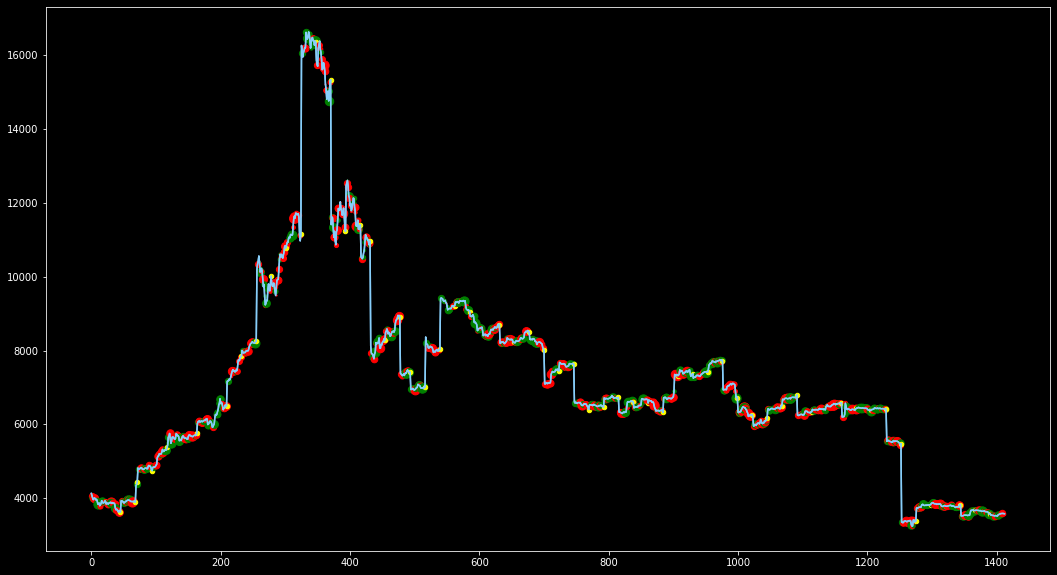

In [6]:
algo.plot()

In [7]:
algo.cash

106767.72815686438

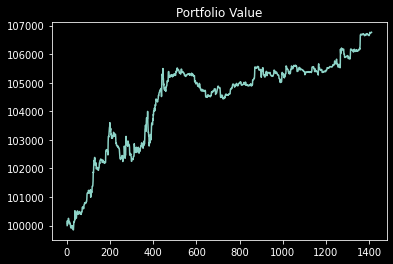

In [25]:
plt.title("Portfolio Value")
plt.plot(list(algo.metrics['Portfolio Marked']))

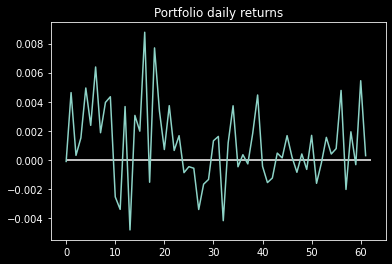

In [32]:
algo.metrics['date'] =  algo.metrics.index.map(lambda x : str(x)[:-8])
plt.title("Portfolio daily returns")
daily_returns = algo.metrics.groupby(['date'])['Portfolio Marked'].first().pct_change().dropna().values
plt.hlines(0 ,0 ,daily_returns.shape[0])
plt.plot(daily_returns)

In [21]:
sr = ((np.mean(daily_returns)-0.035/365)/np.std(daily_returns)*math.sqrt(365))
sr

6.749116406995043

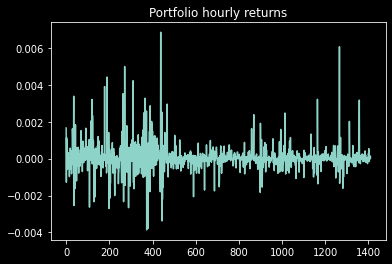

In [23]:
plt.title("Portfolio hourly returns")
returns = algo.metrics['Portfolio Marked'].pct_change().dropna().values

plt.plot(returns)

In [24]:
sr = ((np.mean(returns)-0.035/24/365)/np.std(returns)*math.sqrt(365*24))
sr

5.767158970086588

In [35]:
print(algo.metrics.dropna().info(verbose= True))
algo.metrics.dropna().head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1412 entries, 2017-09-13 02:00:00 to 2019-01-22 22:00:00
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Position USD      1412 non-null   object
 1   Price USD         1412 non-null   object
 2   Cash USD          1412 non-null   object
 3   Portfolio Marked  1412 non-null   object
dtypes: object(4)
memory usage: 55.2+ KB
None


,Position USD,Price USD,Cash USD,Portfolio Marked
2017-09-13 02:00:00,-10000.0,4066.801167,110000.0,100000.0
2017-09-13 03:00:00,12865.729429,3999.225167,87300.435567,100166.164996
2017-09-13 04:00:00,12865.729429,3999.225167,87300.435567,100038.076322
2017-09-13 05:00:00,-16499.724381,3995.046667,116652.44691,100152.72253
2017-09-13 06:00:00,-6995.407217,4005.132264,107106.475771,100111.068553


In [9]:
algo.metrics.iloc[100:120]

,Position USD,Price USD,Cash USD,Portfolio Marked
2017-10-12 06:00:00,11936.811349,4885.02,88842.859191,100811.387875
2017-10-12 07:00:00,-3802.597904,4898.0,104613.985779,100718.225002
2017-10-12 08:00:00,-11639.418729,5018.23,112357.465169,100488.93343
2017-10-12 09:00:00,-4026.459277,5111.0,104529.332464,100469.785476
2017-10-12 10:00:00,4030.584373,5153.0,96439.201103,100481.752862
2017-10-12 11:00:00,-11067.394585,5177.0,111555.952432,100499.24685
2017-10-12 12:00:00,-4425.91126,5163.43,104943.479063,100476.338168
2017-10-12 13:00:00,8337.319827,5200.04,92148.867167,100468.486359
2017-10-12 14:00:00,8337.319827,5200.04,92148.867167,100468.486359
2017-10-12 15:00:00,-7581.575056,5209.28,108082.576712,100352.783936


In [ ]:
x = pd.DataFrame(algo.metrics['Position USD'])

In [ ]:
x = x.dropna()
x[x['Position USD']!=0].index.size

### Generate Random Strategies

In [ ]:
strategy = BitcoinRandomStrategy()
sr = []
for i in range(0,100):
    loading_bar(i, 99)
    algo = customNLP(100000, df['Open'], strategy)
    algo.set_stoploss(0.01)
    algo.run(split = True, verbose = False)
    returns = algo.metrics['Portfolio Marked'].pct_change().dropna().values
    sr.append((np.mean(returns)-0.035/24/365)/np.std(returns)*math.sqrt(365*24))
np.mean(sr)

In [ ]:
np.median(sr)

## Plotting and Testing

In [ ]:
#Prints a simple loading bar
def loading_bar(n,N, message = ''):
    prc  = math.floor(n/N*100)
    a = prc*'#'
    b = (100-prc)*'_'
    clear_output(wait=True)
    display('|' + a + b + '|' + str(prc) + '%' + " " + message)